In [1]:
#import the needed librairies
import pandas as pd
pd.options.display.max_columns = None
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
import datetime as dt

In [2]:
#import the data
df_full= pd.read_csv("..\data\Crime_Data_from_2020_to_Present.csv")
print(f"   📊 Dimensions totales: {df_full.shape[0]:,} lignes × {df_full.shape[1]} colonnes")
print(f"   💾 Taille mémoire: {df_full.memory_usage(deep=True).sum() / 1024**2:.2f} MB")

   📊 Dimensions totales: 1,004,876 lignes × 28 colonnes
   💾 Taille mémoire: 948.26 MB


In [3]:
# Définir le nombre de lignes à extraire
n_rows = 400000
if len(df_full) >= n_rows:
    df_400k = df_full.head(n_rows).copy()
    print(f"\n✅ Extraction réussie de {n_rows:,} lignes ({(n_rows/len(df_full)*100):.1f}% du total)")
print(f"📊 Dimensions extraites: {df_400k.shape[0]:,} lignes × {df_400k.shape[1]} colonnes")


✅ Extraction réussie de 400,000 lignes (39.8% du total)
📊 Dimensions extraites: 400,000 lignes × 28 colonnes


In [4]:
df_400k.to_csv("..\data\crime_v1.csv")

In [5]:
df=df_400k.copy()

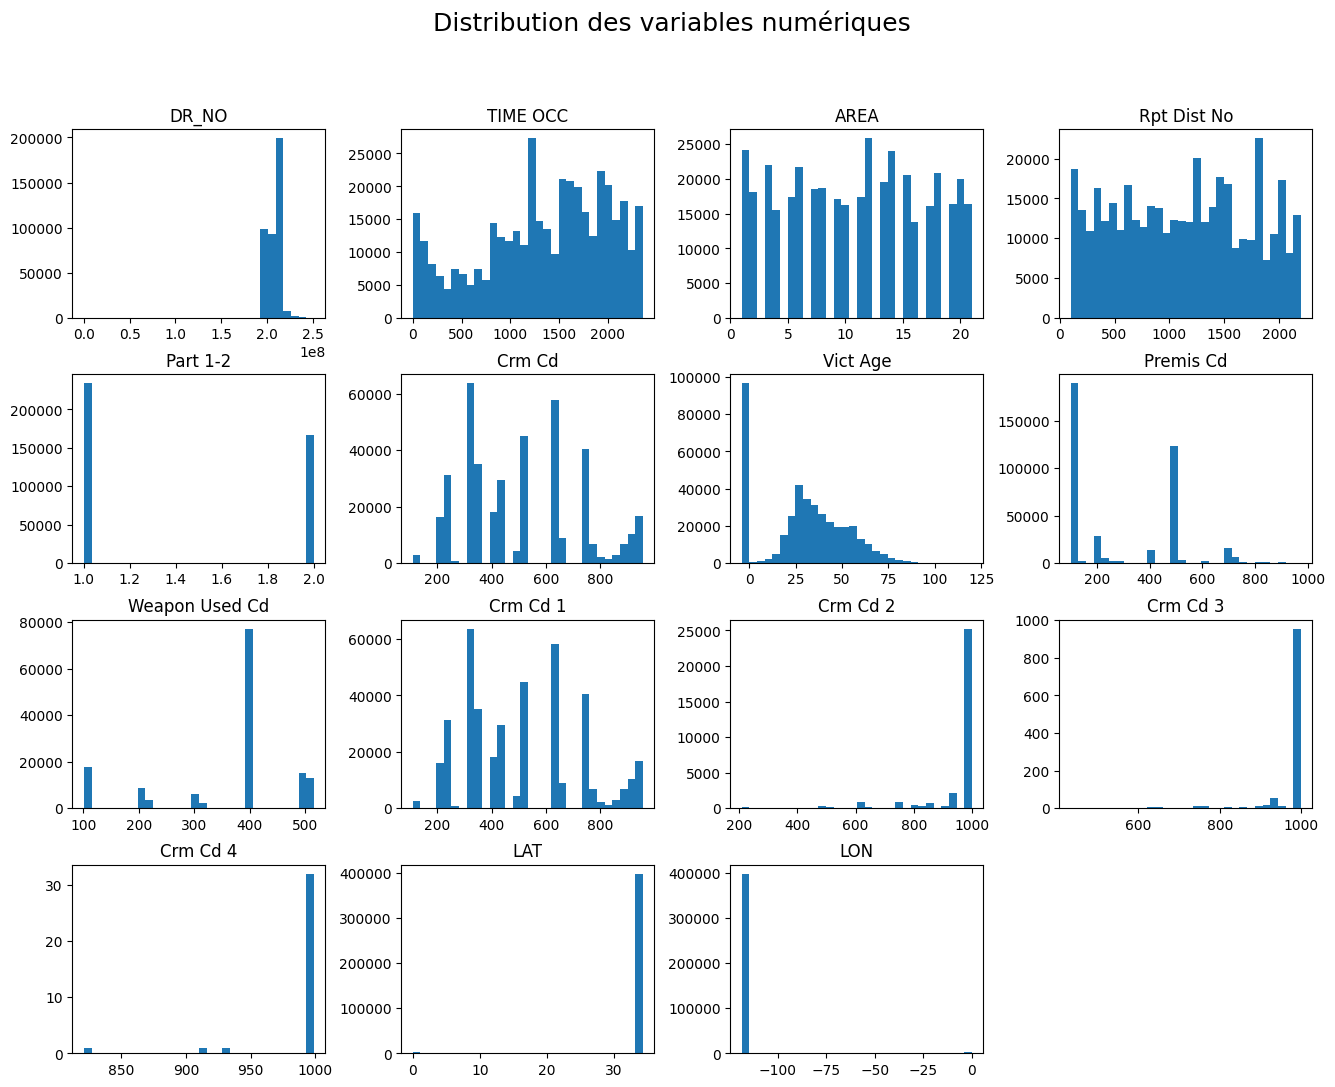

In [6]:
import matplotlib.pyplot as plt
import pandas as pd

# Sélection des colonnes numériques
numeric_cols = df.select_dtypes(include=['int64', 'float64']).columns

# Histogrammes
df[numeric_cols].hist(
    bins=30,
    figsize=(16, 12),
    grid=False
)

plt.suptitle("Distribution des variables numériques", fontsize=18)
plt.show()


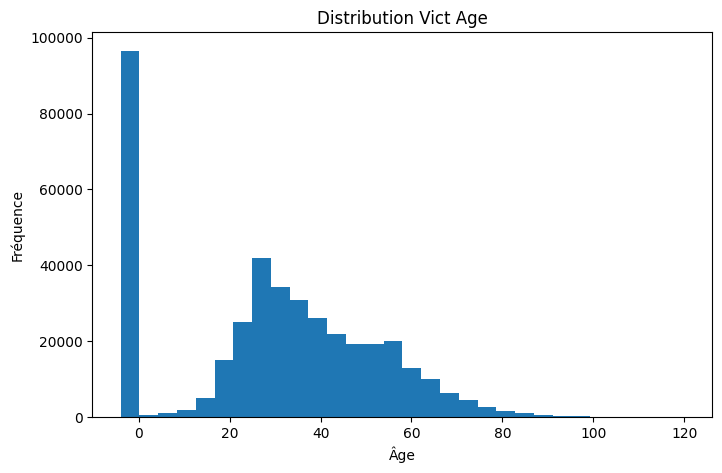

In [7]:
plt.figure(figsize=(8,5))
plt.hist(df['Vict Age'], bins=30)
plt.title("Distribution Vict Age")
plt.xlabel("Âge")
plt.ylabel("Fréquence")
plt.show()


In [4]:
df.head(5)

,DR_NO,Date Rptd,DATE OCC,TIME OCC,AREA,AREA NAME,Rpt Dist No,Part 1-2,Crm Cd,Crm Cd Desc,Mocodes,Vict Age,Vict Sex,Vict Descent,Premis Cd,Premis Desc,Weapon Used Cd,Weapon Desc,Status,Status Desc,Crm Cd 1,Crm Cd 2,Crm Cd 3,Crm Cd 4,LOCATION,Cross Street,LAT,LON
0,190326475,03/01/2020 12:00:00 AM,03/01/2020 12:00:00 AM,2130,7,Wilshire,784,1,510,VEHICLE - STOLEN,NaN,0,M,O,101.0,STREET,NaN,NaN,AA,Adult Arrest,510.0,998.0,NaN,NaN,1900 S LONGWOOD AV,NaN,34.0375,-118.3506
1,200106753,02/09/2020 12:00:00 AM,02/08/2020 12:00:00 AM,1800,1,Central,182,1,330,BURGLARY FROM VEHICLE,1822 1402 0344,47,M,O,128.0,BUS STOP/LAYOVER (ALSO QUERY 124),NaN,NaN,IC,Invest Cont,330.0,998.0,NaN,NaN,1000 S FLOWER ST,NaN,34.0444,-118.2628
2,200320258,11/11/2020 12:00:00 AM,11/04/2020 12:00:00 AM,1700,3,Southwest,356,1,480,BIKE - STOLEN,0344 1251,19,X,X,502.0,"MULTI-UNIT DWELLING (APARTMENT, DUPLEX, ETC)",NaN,NaN,IC,Invest Cont,480.0,NaN,NaN,NaN,1400 W 37TH ST,NaN,34.0210,-118.3002
3,200907217,05/10/2023 12:00:00 AM,03/10/2020 12:00:00 AM,2037,9,Van Nuys,964,1,343,SHOPLIFTING-GRAND THEFT ($950.01 & OVER),0325 1501,19,M,O,405.0,CLOTHING STORE,NaN,NaN,IC,Invest Cont,343.0,NaN,NaN,NaN,14000 RIVERSIDE DR,NaN,34.1576,-118.4387
4,200412582,09/09/2020 12:00:00 AM,09/09/2020 12:00:00 AM,630,4,Hollenbeck,413,1,510,VEHICLE - STOLEN,NaN,0,NaN,NaN,101.0,STREET,NaN,NaN,IC,Invest Cont,510.0,NaN,NaN,NaN,200 E AVENUE 28,NaN,34.0820,-118.2130


In [ ]:
df.shape

(1004876, 28)

# Data preprocessing steps :

## **Check the data types of the columns** :

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1004876 entries, 0 to 1004875
Data columns (total 28 columns):
 #   Column          Non-Null Count    Dtype  
---  ------          --------------    -----  
 0   DR_NO           1004876 non-null  int64  
 1   Date Rptd       1004876 non-null  object 
 2   DATE OCC        1004876 non-null  object 
 3   TIME OCC        1004876 non-null  int64  
 4   AREA            1004876 non-null  int64  
 5   AREA NAME       1004876 non-null  object 
 6   Rpt Dist No     1004876 non-null  int64  
 7   Part 1-2        1004876 non-null  int64  
 8   Crm Cd          1004876 non-null  int64  
 9   Crm Cd Desc     1004876 non-null  object 
 10  Mocodes         853279 non-null   object 
 11  Vict Age        1004876 non-null  int64  
 12  Vict Sex        860267 non-null   object 
 13  Vict Descent    860255 non-null   object 
 14  Premis Cd       1004860 non-null  float64
 15  Premis Desc     1004288 non-null  object 
 16  Weapon Used Cd  327202 non-null   fl

In [7]:
df.columns

Index(['DR_NO', 'Date Rptd', 'DATE OCC', 'TIME OCC', 'AREA', 'AREA NAME',
       'Rpt Dist No', 'Part 1-2', 'Crm Cd', 'Crm Cd Desc', 'Mocodes',
       'Vict Age', 'Vict Sex', 'Vict Descent', 'Premis Cd', 'Premis Desc',
       'Weapon Used Cd', 'Weapon Desc', 'Status', 'Status Desc', 'Crm Cd 1',
       'Crm Cd 2', 'Crm Cd 3', 'Crm Cd 4', 'LOCATION', 'Cross Street', 'LAT',
       'LON'],
      dtype='object')

In [8]:
df.columns = (
    df.columns
    .str.lower()               # tout en minuscule
    .str.replace(' ', '_')     # remplacer espace par _
    .str.replace('-', '_')     # remplacer tiret par _
    .str.replace('/', '_')     # remplacer slash par _
    .str.replace(r'[^a-z0-9_]', '', regex=True)  # enlever caractères spéciaux
)


In [9]:
# drop code crime 
df.drop("dr_no",axis=1,inplace=True)

In [10]:
df = df.rename(columns={"part_1_2": "crm_categories"})

In [11]:
df.head(5)

,date_rptd,date_occ,time_occ,area,area_name,rpt_dist_no,crm_categories,crm_cd,crm_cd_desc,mocodes,vict_age,vict_sex,vict_descent,premis_cd,premis_desc,weapon_used_cd,weapon_desc,status,status_desc,crm_cd_1,crm_cd_2,crm_cd_3,crm_cd_4,location,cross_street,lat,lon
0,03/01/2020 12:00:00 AM,03/01/2020 12:00:00 AM,2130,7,Wilshire,784,1,510,VEHICLE - STOLEN,NaN,0,M,O,101.0,STREET,NaN,NaN,AA,Adult Arrest,510.0,998.0,NaN,NaN,1900 S LONGWOOD AV,NaN,34.0375,-118.3506
1,02/09/2020 12:00:00 AM,02/08/2020 12:00:00 AM,1800,1,Central,182,1,330,BURGLARY FROM VEHICLE,1822 1402 0344,47,M,O,128.0,BUS STOP/LAYOVER (ALSO QUERY 124),NaN,NaN,IC,Invest Cont,330.0,998.0,NaN,NaN,1000 S FLOWER ST,NaN,34.0444,-118.2628
2,11/11/2020 12:00:00 AM,11/04/2020 12:00:00 AM,1700,3,Southwest,356,1,480,BIKE - STOLEN,0344 1251,19,X,X,502.0,"MULTI-UNIT DWELLING (APARTMENT, DUPLEX, ETC)",NaN,NaN,IC,Invest Cont,480.0,NaN,NaN,NaN,1400 W 37TH ST,NaN,34.0210,-118.3002
3,05/10/2023 12:00:00 AM,03/10/2020 12:00:00 AM,2037,9,Van Nuys,964,1,343,SHOPLIFTING-GRAND THEFT ($950.01 & OVER),0325 1501,19,M,O,405.0,CLOTHING STORE,NaN,NaN,IC,Invest Cont,343.0,NaN,NaN,NaN,14000 RIVERSIDE DR,NaN,34.1576,-118.4387
4,09/09/2020 12:00:00 AM,09/09/2020 12:00:00 AM,630,4,Hollenbeck,413,1,510,VEHICLE - STOLEN,NaN,0,NaN,NaN,101.0,STREET,NaN,NaN,IC,Invest Cont,510.0,NaN,NaN,NaN,200 E AVENUE 28,NaN,34.0820,-118.2130


In [12]:
df.columns

Index(['date_rptd', 'date_occ', 'time_occ', 'area', 'area_name', 'rpt_dist_no',
       'crm_categories', 'crm_cd', 'crm_cd_desc', 'mocodes', 'vict_age',
       'vict_sex', 'vict_descent', 'premis_cd', 'premis_desc',
       'weapon_used_cd', 'weapon_desc', 'status', 'status_desc', 'crm_cd_1',
       'crm_cd_2', 'crm_cd_3', 'crm_cd_4', 'location', 'cross_street', 'lat',
       'lon'],
      dtype='object')

# drop duplicated columns

In [13]:
df.duplicated().sum()

2970

In [14]:
df=df.drop_duplicates()

In [15]:
df.shape

(1001906, 27)

# Type casting


In [16]:
# Conversion date
df['date_occ'] = pd.to_datetime(df['date_occ'], format="%m/%d/%Y %I:%M:%S %p")

# Features temporelles
df['Year']      = df['date_occ'].dt.year
df['Month']     = df['date_occ'].dt.month
df['Day']       = df['date_occ'].dt.day
df['Hour']      = df['time_occ'] // 100
df['Minute']    = df['time_occ'] % 100 
df['Weekday']   = df['date_occ'].dt.weekday  # 0 = lundi, 6 = dimanche
df['is_weekend']= df['Weekday'].isin([5, 6])

In [17]:
df.head()

,date_rptd,date_occ,time_occ,area,area_name,rpt_dist_no,crm_categories,crm_cd,crm_cd_desc,mocodes,vict_age,vict_sex,vict_descent,premis_cd,premis_desc,weapon_used_cd,weapon_desc,status,status_desc,crm_cd_1,crm_cd_2,crm_cd_3,crm_cd_4,location,cross_street,lat,lon,Year,Month,Day,Hour,Minute,Weekday,is_weekend
0,03/01/2020 12:00:00 AM,2020-03-01,2130,7,Wilshire,784,1,510,VEHICLE - STOLEN,NaN,0,M,O,101.0,STREET,NaN,NaN,AA,Adult Arrest,510.0,998.0,NaN,NaN,1900 S LONGWOOD AV,NaN,34.0375,-118.3506,2020,3,1,21,30,6,True
1,02/09/2020 12:00:00 AM,2020-02-08,1800,1,Central,182,1,330,BURGLARY FROM VEHICLE,1822 1402 0344,47,M,O,128.0,BUS STOP/LAYOVER (ALSO QUERY 124),NaN,NaN,IC,Invest Cont,330.0,998.0,NaN,NaN,1000 S FLOWER ST,NaN,34.0444,-118.2628,2020,2,8,18,0,5,True
2,11/11/2020 12:00:00 AM,2020-11-04,1700,3,Southwest,356,1,480,BIKE - STOLEN,0344 1251,19,X,X,502.0,"MULTI-UNIT DWELLING (APARTMENT, DUPLEX, ETC)",NaN,NaN,IC,Invest Cont,480.0,NaN,NaN,NaN,1400 W 37TH ST,NaN,34.0210,-118.3002,2020,11,4,17,0,2,False
3,05/10/2023 12:00:00 AM,2020-03-10,2037,9,Van Nuys,964,1,343,SHOPLIFTING-GRAND THEFT ($950.01 & OVER),0325 1501,19,M,O,405.0,CLOTHING STORE,NaN,NaN,IC,Invest Cont,343.0,NaN,NaN,NaN,14000 RIVERSIDE DR,NaN,34.1576,-118.4387,2020,3,10,20,37,1,False
4,09/09/2020 12:00:00 AM,2020-09-09,630,4,Hollenbeck,413,1,510,VEHICLE - STOLEN,NaN,0,NaN,NaN,101.0,STREET,NaN,NaN,IC,Invest Cont,510.0,NaN,NaN,NaN,200 E AVENUE 28,NaN,34.0820,-118.2130,2020,9,9,6,30,2,False


## NAN values

In [18]:
df.isna().sum()

date_rptd               0
date_occ                0
time_occ                0
area                    0
area_name               0
rpt_dist_no             0
crm_categories          0
crm_cd                  0
crm_cd_desc             0
mocodes            150347
vict_age                0
vict_sex           143394
vict_descent       143406
premis_cd              16
premis_desc           587
weapon_used_cd     675652
weapon_desc        675652
status                  1
status_desc             0
crm_cd_1               11
crm_cd_2           932851
crm_cd_3           999593
crm_cd_4          1001842
location                0
cross_street       848122
lat                     0
lon                     0
Year                    0
Month                   0
Day                     0
Hour                    0
Minute                  0
Weekday                 0
is_weekend              0
dtype: int64

In [19]:
df.nunique()

date_rptd           1847
date_occ            1826
time_occ            1439
area                  21
area_name             21
rpt_dist_no         1210
crm_categories         2
crm_cd               140
crm_cd_desc          140
mocodes           310816
vict_age             104
vict_sex               5
vict_descent          20
premis_cd            314
premis_desc          306
weapon_used_cd        79
weapon_desc           79
status                 6
status_desc            6
crm_cd_1             142
crm_cd_2             126
crm_cd_3              38
crm_cd_4               6
location           66564
cross_street       10413
lat                 5426
lon                 4982
Year                   5
Month                 12
Day                   31
Hour                  24
Minute                60
Weekday                7
is_weekend             2
dtype: int64

In [20]:
df['vict_descent'].fillna('UNKNOWN', inplace=True)

print("Number of null values:", df['vict_descent'].isnull().sum())

Number of null values: 0


C:\Users\pc\AppData\Local\Temp\ipykernel_10344\234686060.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['vict_descent'].fillna('UNKNOWN', inplace=True)


In [21]:
df["vict_sex"].value_counts()
df['vict_sex'] = df['vict_sex'].fillna('X')
df['vict_sex'] = df['vict_sex'].replace({'H': 'X', '-': 'X'})


In [22]:
df["vict_sex"].value_counts()

vict_sex
M    403117
F    358316
X    240473
Name: count, dtype: int64

In [23]:
df["vict_descent"]= df['vict_descent'].replace({'-': 'UNKNOWN'})

In [24]:
mode_mocodes = df['mocodes'].mode()
if not mode_mocodes.empty:
    df['mocodes'] = df['mocodes'].fillna(mode_mocodes[0])
mode_premis = df['premis_cd'].mode()
if not mode_premis.empty:
    df['premis_cd'] = df['premis_cd'].fillna(mode_premis[0])
mode_premis = df['premis_desc'].mode()
if not mode_premis.empty:
    df['premis_desc'] = df['premis_desc'].fillna(mode_premis[0])
mode_status = df['status'].mode()
if not mode_status.empty:
    df['status'] = df['status'].fillna(mode_status[0])

In [25]:
import re
df['premis_desc'] = df['premis_desc'].str.title()

df['premis_desc'] = df['premis_desc'].str.replace(r'\(.*?\)', '', regex=True)

df['premis_desc'] = df['premis_desc'].apply(
    lambda x: re.sub(r'(?<=[a-z])(?=[A-Z])', ' ', str(x))
)

df['premis_desc'] = df['premis_desc'].str.strip()
df['premis_desc'] = df['premis_desc'].str.replace(r'\s+', ' ', regex=True)



In [26]:
df["premis_desc"]

0                        Street
1              Bus Stop/Layover
2           Multi-Unit Dwelling
3                Clothing Store
4                        Street
                   ...         
1004871                  Street
1004872                   Hotel
1004873    Restaurant/Fast Food
1004874                Sidewalk
1004875             Parking Lot
Name: premis_desc, Length: 1001906, dtype: object

In [27]:
df['weapon_desc'] = df['weapon_desc'].fillna('NO WEAPON')
df['weapon_used_cd'] = df['weapon_used_cd'].fillna(0.0)

In [28]:
#I will remove the columns Crm Cd 1 to Crm Cd 4 because they contain additional crime codes:
# Crm Cd 1 is usually identical to Crm Cd, and the others are almost entirely empty.
df.drop("crm_cd_1",axis=1,inplace=True)


In [29]:
threshold = 0.5

cols_to_drop = []

for col in df.columns:
    null_ratio = df[col].isnull().mean()
    if null_ratio > threshold:
        cols_to_drop.append(col)
        print(f"Dropping column '{col}' with {null_ratio*100:.2f}% null values")

df.drop(columns=cols_to_drop, inplace=True)

Dropping column 'crm_cd_2' with 93.11% null values
Dropping column 'crm_cd_3' with 99.77% null values
Dropping column 'crm_cd_4' with 99.99% null values
Dropping column 'cross_street' with 84.65% null values


In [30]:
df.isna().sum()

date_rptd         0
date_occ          0
time_occ          0
area              0
area_name         0
rpt_dist_no       0
crm_categories    0
crm_cd            0
crm_cd_desc       0
mocodes           0
vict_age          0
vict_sex          0
vict_descent      0
premis_cd         0
premis_desc       0
weapon_used_cd    0
weapon_desc       0
status            0
status_desc       0
location          0
lat               0
lon               0
Year              0
Month             0
Day               0
Hour              0
Minute            0
Weekday           0
is_weekend        0
dtype: int64

## transform categorical values

In [31]:
cat_cols = df.select_dtypes(include='object').columns
print(cat_cols)


Index(['date_rptd', 'area_name', 'crm_cd_desc', 'mocodes', 'vict_sex',
       'vict_descent', 'premis_desc', 'weapon_desc', 'status', 'status_desc',
       'location'],
      dtype='object')


In [32]:
df[cat_cols]

,date_rptd,area_name,crm_cd_desc,mocodes,vict_sex,vict_descent,premis_desc,weapon_desc,status,status_desc,location
0,03/01/2020 12:00:00 AM,Wilshire,VEHICLE - STOLEN,0344,M,O,Street,NO WEAPON,AA,Adult Arrest,1900 S LONGWOOD AV
1,02/09/2020 12:00:00 AM,Central,BURGLARY FROM VEHICLE,1822 1402 0344,M,O,Bus Stop/Layover,NO WEAPON,IC,Invest Cont,1000 S FLOWER ST
2,11/11/2020 12:00:00 AM,Southwest,BIKE - STOLEN,0344 1251,X,X,Multi-Unit Dwelling,NO WEAPON,IC,Invest Cont,1400 W 37TH ST
3,05/10/2023 12:00:00 AM,Van Nuys,SHOPLIFTING-GRAND THEFT ($950.01 & OVER),0325 1501,M,O,Clothing Store,NO WEAPON,IC,Invest Cont,14000 RIVERSIDE DR
4,09/09/2020 12:00:00 AM,Hollenbeck,VEHICLE - STOLEN,0344,X,UNKNOWN,Street,NO WEAPON,IC,Invest Cont,200 E AVENUE 28
...,...,...,...,...,...,...,...,...,...,...,...
1004871,07/24/2024 12:00:00 AM,Wilshire,VEHICLE - STOLEN,0344,X,UNKNOWN,Street,NO WEAPON,IC,Invest Cont,4000 W 23RD ST
1004872,01/15/2024 12:00:00 AM,Central,VANDALISM - MISDEAMEANOR ($399 OR UNDER),0329 0400 0416,X,X,Hotel,UNKNOWN WEAPON/OTHER WEAPON,IC,Invest Cont,1300 W SUNSET BL
1004873,10/14/2024 12:00:00 AM,Hollenbeck,"THEFT-GRAND ($950.01 & OVER)EXCPT,GUNS,FOWL,LI...",0344,M,B,Restaurant/Fast Food,NO WEAPON,IC,Invest Cont,1700 ALBION ST
1004874,04/24/2024 12:00:00 AM,Southwest,"ASSAULT WITH DEADLY WEAPON, AGGRAVATED ASSAULT",1822 0334 0416 0445 0449 1202,F,W,Sidewalk,STICK,IC,Invest Cont,FLOWER ST


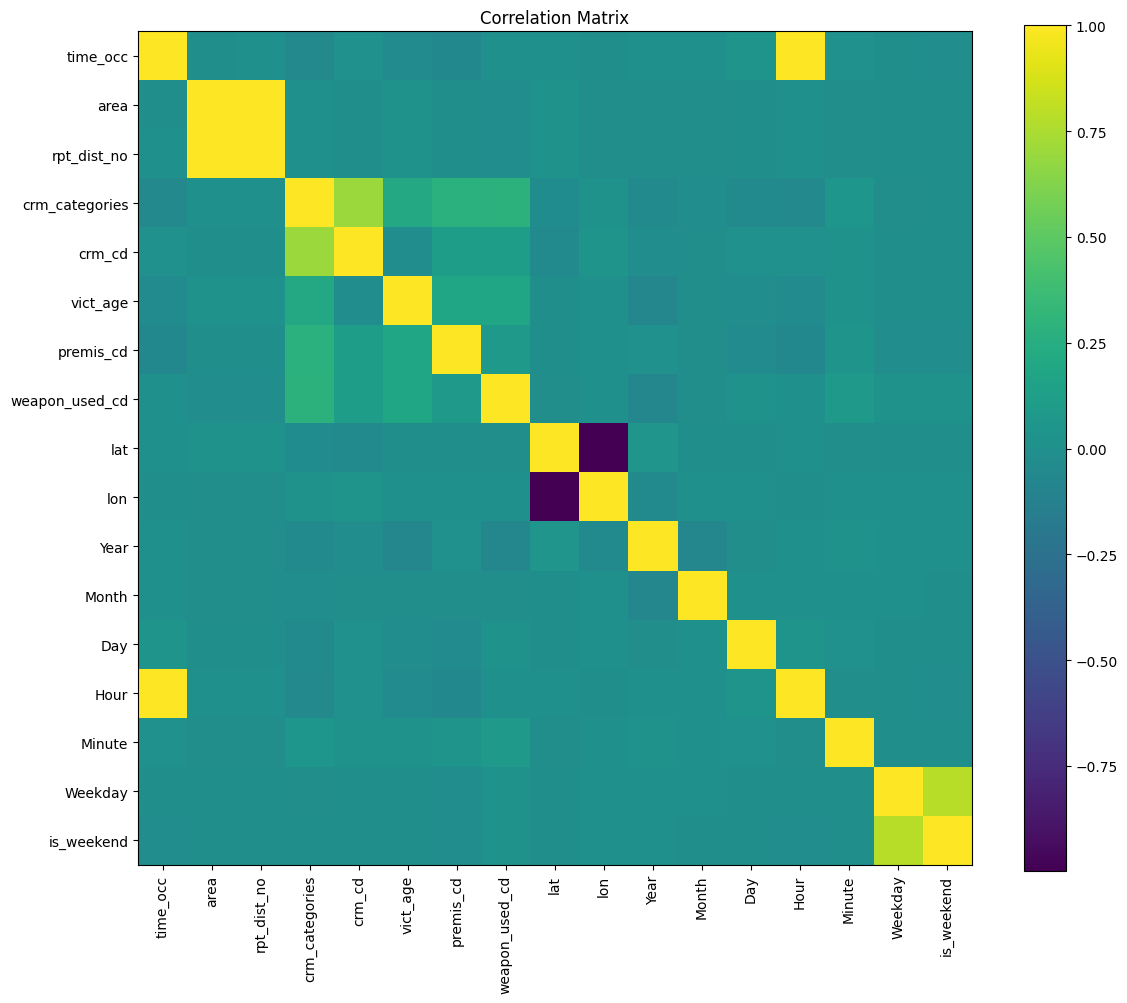

In [33]:
import matplotlib.pyplot as plt
import numpy as np

# Calcul de la matrice de corrélation
corr = df.corr(numeric_only=True)

# Affichage du graphique
plt.figure(figsize=(12, 10))
plt.imshow(corr, interpolation='nearest')
plt.colorbar()   # barre de couleurs automatique

# Ajouter les noms des colonnes
plt.xticks(range(len(corr.columns)), corr.columns, rotation=90)
plt.yticks(range(len(corr.columns)), corr.columns)

plt.title("Correlation Matrix")
plt.tight_layout()
plt.show()


In [34]:
import numpy as np

# matrice de corrélation absolue
corr_matrix = df.corr(numeric_only=True).abs()

# sélectionner les valeurs au-dessus de 0.95 (hors diagonale)
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))

# récupérer les colonnes fortement corrélées
high_corr = [
    (col, row, upper.loc[row, col])
    for col in upper.columns
    for row in upper.index
    if upper.loc[row, col] > 0.7
]

high_corr


[('rpt_dist_no', 'area', 0.9990507993088316),
 ('lon', 'lat', 0.9981944906250104),
 ('Hour', 'time_occ', 0.9996116046057657),
 ('is_weekend', 'Weekday', 0.7836401229744263)]

In [35]:
cols=['is_weekend',]

In [36]:
df[["time_occ","Hour","Minute"]]

,time_occ,Hour,Minute
0,2130,21,30
1,1800,18,0
2,1700,17,0
3,2037,20,37
4,630,6,30
...,...,...,...
1004871,1400,14,0
1004872,100,1,0
1004873,2330,23,30
1004874,1500,15,0


In [37]:
df.columns

Index(['date_rptd', 'date_occ', 'time_occ', 'area', 'area_name', 'rpt_dist_no',
       'crm_categories', 'crm_cd', 'crm_cd_desc', 'mocodes', 'vict_age',
       'vict_sex', 'vict_descent', 'premis_cd', 'premis_desc',
       'weapon_used_cd', 'weapon_desc', 'status', 'status_desc', 'location',
       'lat', 'lon', 'Year', 'Month', 'Day', 'Hour', 'Minute', 'Weekday',
       'is_weekend'],
      dtype='object')

In [38]:
df[["area","area_name"]]

,area,area_name
0,7,Wilshire
1,1,Central
2,3,Southwest
3,9,Van Nuys
4,4,Hollenbeck
...,...,...
1004871,7,Wilshire
1004872,1,Central
1004873,4,Hollenbeck
1004874,3,Southwest


In [39]:
df.dtypes

date_rptd                 object
date_occ          datetime64[ns]
time_occ                   int64
area                       int64
area_name                 object
rpt_dist_no                int64
crm_categories             int64
crm_cd                     int64
crm_cd_desc               object
mocodes                   object
vict_age                   int64
vict_sex                  object
vict_descent              object
premis_cd                float64
premis_desc               object
weapon_used_cd           float64
weapon_desc               object
status                    object
status_desc               object
location                  object
lat                      float64
lon                      float64
Year                       int32
Month                      int32
Day                        int32
Hour                       int64
Minute                     int64
Weekday                    int32
is_weekend                  bool
dtype: object

# encoding

In [40]:
cols_to_keep = [
    'date_occ', 'area', 'rpt_dist_no', 'crm_categories',
    'crm_cd', 'vict_age', 'vict_sex', 'vict_descent',
    'premis_cd', 'weapon_used_cd', 'lat', 'lon'
]

In [41]:
def select_object_columns(df, cols):
    """
    Sélectionne uniquement les colonnes de type object dans la liste fournie.
    
    Parameters:
        df : pd.DataFrame
        cols : list of str, colonnes à filtrer

    Returns:
        list of str : colonnes de type object existantes dans df
    """
    return [col for col in cols if col in df.columns and df[col].dtype == 'object']

object_cols = select_object_columns(df, cols_to_keep)
print(object_cols)


['vict_sex', 'vict_descent']


In [42]:
df=df[cols_to_keep]

In [43]:
df["vict_descent"].value_counts()

vict_descent
H          296067
W          201221
UNKNOWN    143408
B          135679
X          105771
O           77796
A           21327
K            5990
F            4839
C            4630
J            1584
V            1194
I            1015
Z             577
P             288
U             220
D              91
L              77
G              74
S              58
Name: count, dtype: int64

In [44]:
df["vict_sex"].value_counts()

vict_sex
M    403117
F    358316
X    240473
Name: count, dtype: int64

In [45]:
df = pd.get_dummies(df, columns=['vict_sex'], prefix='vict_sex', dtype=int)

In [46]:
# 1. Affiche les 3 colonnes qui viennent d'être créées
print("Colonnes créées pour vict_sex :")
vict_sex_columns = [col for col in df.columns if col.startswith('vict_sex_')]
print(vict_sex_columns)

# 2. Vérifie les sommes (doit correspondre à tes valeurs initiales)
print("\nVérification des comptes :")
print(df[vict_sex_columns].sum())

Colonnes créées pour vict_sex :
['vict_sex_F', 'vict_sex_M', 'vict_sex_X']

Vérification des comptes :
vict_sex_F    358316
vict_sex_M    403117
vict_sex_X    240473
dtype: int64


In [47]:
from sklearn.preprocessing import LabelEncoder
le_descent = LabelEncoder()
df['Vict_Descent_LE'] = le_descent.fit_transform(df['vict_descent'])

In [48]:
cols_to_keep = [
    'date_occ', 'area', 'rpt_dist_no', 'crm_categories',
    'crm_cd', 'vict_age', 'Vict_Descent_LE',
    'premis_cd', 'weapon_used_cd', 'lat', 'lon'
]

In [49]:
cols_to_keep += ['vict_sex_F', 'vict_sex_M', 'vict_sex_X']

In [50]:
df_final = df[cols_to_keep].copy()

print(df_final.head())
print(df_final.shape)

    date_occ  area  rpt_dist_no  crm_categories  crm_cd  vict_age  \
0 2020-03-01     7          784               1     510         0   
1 2020-02-08     1          182               1     330        47   
2 2020-11-04     3          356               1     480        19   
3 2020-03-10     9          964               1     343        19   
4 2020-09-09     4          413               1     510         0   

   Vict_Descent_LE  premis_cd  weapon_used_cd      lat       lon  vict_sex_F  \
0               11      101.0             0.0  34.0375 -118.3506           0   
1               11      128.0             0.0  34.0444 -118.2628           0   
2               18      502.0             0.0  34.0210 -118.3002           0   
3               11      405.0             0.0  34.1576 -118.4387           0   
4               15      101.0             0.0  34.0820 -118.2130           0   

   vict_sex_M  vict_sex_X  
0           1           0  
1           1           0  
2           0       

In [51]:
df_final.head()

,date_occ,area,rpt_dist_no,crm_categories,crm_cd,vict_age,Vict_Descent_LE,premis_cd,weapon_used_cd,lat,lon,vict_sex_F,vict_sex_M,vict_sex_X
0,2020-03-01,7,784,1,510,0,11,101.0,0.0,34.0375,-118.3506,0,1,0
1,2020-02-08,1,182,1,330,47,11,128.0,0.0,34.0444,-118.2628,0,1,0
2,2020-11-04,3,356,1,480,19,18,502.0,0.0,34.0210,-118.3002,0,0,1
3,2020-03-10,9,964,1,343,19,11,405.0,0.0,34.1576,-118.4387,0,1,0
4,2020-09-09,4,413,1,510,0,15,101.0,0.0,34.0820,-118.2130,0,0,1


In [52]:
df_final.dtypes

date_occ           datetime64[ns]
area                        int64
rpt_dist_no                 int64
crm_categories              int64
crm_cd                      int64
vict_age                    int64
Vict_Descent_LE             int32
premis_cd                 float64
weapon_used_cd            float64
lat                       float64
lon                       float64
vict_sex_F                  int32
vict_sex_M                  int32
vict_sex_X                  int32
dtype: object

## target construction 

In [53]:
def categorize_crime(crime):
    crime = crime.upper()

    # 1️⃣ السرقة والسطو / Theft and Burglary
    if any(x in crime for x in [
        'VEHICLE - STOLEN', 'BURGLARY FROM VEHICLE', 'BIKE - STOLEN',
        'SHOPLIFTING-GRAND THEFT', 'BURGLARY', 'THEFT-GRAND', 'BUNCO, GRAND THEFT',
        'THEFT PLAIN', 'THEFT FROM MOTOR VEHICLE', 'TILL TAP', 'BOAT - STOLEN',
        'DISHONEST EMPLOYEE', 'PURSE SNATCHING', 'PETTY THEFT - AUTO REPAIR',
        'SHOPLIFTING - PETTY THEFT', 'THEFT FROM PERSON', 'BUNCO, PETTY THEFT',
        'THEFT, PERSON', 'THEFT, COIN MACHINE', 'GRAND THEFT / AUTO REPAIR',
        'BIKE - ATTEMPTED STOLEN', 'VEHICLE - ATTEMPT STOLEN',
        'VEHICLE, STOLEN - OTHER', 'PICKPOCKET', 'SHOPLIFTING - ATTEMPT',
        'BUNCO, ATTEMPT', 'PICKPOCKET, ATTEMPT'
    ]):
        return 'السرقة والسطو / Theft and Burglary'

    # 2️⃣ العنف والاعتداء / Violence and Assault
    elif any(x in crime for x in [
        'ASSAULT', 'BATTERY', 'ROBBERY', 'KIDNAPPING', 'CRIMINAL HOMICIDE',
        'MANSLAUGHTER', 'ATTEMPTED ROBBERY', 'INTIMATE PARTNER - SIMPLE ASSAULT',
        'INTIMATE PARTNER - AGGRAVATED ASSAULT', 'OTHER ASSAULT',
        'BATTERY POLICE', 'BATTERY ON A FIREFIGHTER',
        'EXTORTION', 'FALSE IMPRISONMENT', 'STALKING',
        'CHILD', 'CHILD ABUSE', 'CHILD NEGLECT', 'CHILD ANNOYING',
        'CHILD STEALING', 'DISRUPT SCHOOL', 'DRUGS, TO A MINOR',
        'CRM AGNST CHLD',
        'CONTRIBUTING', 'TRAIN WRECKING', 'FAILURE TO DISPERSE', 'BLOCKING DOOR INDUCTION CENTER'
    ]):
        return 'العنف والاعتداء / Violence and Assault'

    # 3️⃣ التخريب والتدمير / Vandalism and Destruction
    elif any(x in crime for x in [
        'VANDALISM', 'ARSON', 'SHOTS FIRED', 'THROWING OBJECT', 'DAMAGE', 'BOMB SCARE','DISTURBING THE PEACE'
    ]):
        return 'التخريب والتدمير / Vandalism and Destruction'

    # 4️⃣ الاحتيال والتزوير / Fraud and Forgery
    elif any(x in crime for x in [
        'CREDIT CARDS', 'EMBEZZLEMENT', 'DEFRAUDING', 'THEFT OF SERVICES',
        'DOCUMENT WORTHLESS', 'GRAND THEFT / INSURANCE FRAUD', 'THEFT OF IDENTITY'
    ]):
        return 'الاحتيال والتزوير / Fraud and Forgery'

    # 5️⃣ المخالفات القانونية والجرائم المتعلقة بالأسلحة / Legal Offences & Weapons
    elif any(x in crime for x in [
        'COURT ORDER', 'VIOLATION OF COURT', 'CONTEMPT', 'FALSE POLICE REPORT',
        'DOCUMENT FORGERY', 'COUNTERFEIT', 'BRIBERY', 'CONSPIRACY', 'THREATENING PHONE CALLS',
        'VIOLATION OF RESTRAINING ORDER', 'VIOLATION OF TEMPORARY RESTRAINING ORDER',
        'TRESPASSING', 'RESISTING ARREST', 'UNAUTHORIZED COMPUTER ACCESS',
        'WEAPON', 'FIREARM', 'BRANDISH', 'DISCHARGE', 'REPLICA FIREARMS', 'FIREARMS RESTRAINING ORDER'
    ]):
        return 'المخالفات القانونية والجرائم المتعلقة بالأسلحة / Legal Offences & Weapons'

    # 6️⃣ الجرائم الجنسية والاتجار / Sexual Crimes & Exploitation
    elif any(x in crime for x in [
        'RAPE', 'SEX', 'INDECENT', 'LEWD', 'SODOMY', 'ORAL COPULATION',
        'SEXUAL PENETRATION', 'CHILD PORNOGRAPHY', 'HUMAN TRAFFICKING',
        'BATTERY WITH SEXUAL CONTACT', 'BEASTIALITY', 'INCEST', 'PEEPING TOM', 'BIGAMY',
        'TRAFFICKING', 'PIMPING', 'PANDERING'
    ]):
        return 'الجرائم الجنسية والاتجار / Sexual Crimes & Exploitation'

    

    # 8️⃣ جرائم متنوعة / Miscellaneous Crimes
    elif any(x in crime for x in [
        'OTHER MISCELLANEOUS CRIME', 'ANIMAL', 'CRUELTY', 'ILLEGAL DUMPING',
        'LYNCHING', 'INCITING', 'THREAT', 'PROWLER', 'INCITING A RIOT','DRIVING', 'RECKLESS', 'FAILURE TO YIELD', 'DRUNK'
    ]):
        return 'جرائم متنوعة / Miscellaneous Crimes'

    # Default
    return 'جرائم متنوعة / Miscellaneous Crimes'

# Apply to DataFrame
df_final['Crime_Class'] = df1['Crm Cd Desc'].apply(categorize_crime)



In [54]:
df_final.head()

,date_occ,area,rpt_dist_no,crm_categories,crm_cd,vict_age,Vict_Descent_LE,premis_cd,weapon_used_cd,lat,lon,vict_sex_F,vict_sex_M,vict_sex_X,Crime_Class
0,2020-03-01,7,784,1,510,0,11,101.0,0.0,34.0375,-118.3506,0,1,0,السرقة والسطو / Theft and Burglary
1,2020-02-08,1,182,1,330,47,11,128.0,0.0,34.0444,-118.2628,0,1,0,السرقة والسطو / Theft and Burglary
2,2020-11-04,3,356,1,480,19,18,502.0,0.0,34.0210,-118.3002,0,0,1,السرقة والسطو / Theft and Burglary
3,2020-03-10,9,964,1,343,19,11,405.0,0.0,34.1576,-118.4387,0,1,0,السرقة والسطو / Theft and Burglary
4,2020-09-09,4,413,1,510,0,15,101.0,0.0,34.0820,-118.2130,0,0,1,السرقة والسطو / Theft and Burglary


In [55]:
# Comptage des catégories
crime_counts = df_final['Crime_Class'].value_counts()

# Calcul des pourcentages
crime_percent = crime_counts / crime_counts.sum() * 100

# Affichage propre
crime_percent = crime_percent.round(2)  # Arrondi à 2 décimales

print(crime_percent)

Crime_Class
السرقة والسطو / Theft and Burglary                                           47.60
العنف والاعتداء / Violence and Assault                                       25.07
التخريب والتدمير / Vandalism and Destruction                                  9.64
المخالفات القانونية والجرائم المتعلقة بالأسلحة / Legal Offences & Weapons     7.92
الاحتيال والتزوير / Fraud and Forgery                                         6.74
الجرائم الجنسية والاتجار / Sexual Crimes & Exploitation                       2.05
جرائم متنوعة / Miscellaneous Crimes                                           0.98
Name: count, dtype: float64


In [56]:
from sklearn.preprocessing import LabelEncoder

# 1. Création du LabelEncoder et encodage de la cible
le = LabelEncoder()
df_final['Crime_Class_Enc'] = le.fit_transform(df_final['Crime_Class'])   

In [57]:
# 2. Affichage clair du mapping (c'est ce que tu veux !)
print(" Mapping des classes (Label Encoding) ".center(60, "="))
print(f"{'Code':<6} {'Classe':<50}")
print("-" * 60)
for code, classe in enumerate(le.classes_):
    print(f"{code:<6} → {classe}")
print("=" * 60)

=========== Mapping des classes (Label Encoding) ===========
Code   Classe                                            
------------------------------------------------------------
0      → الاحتيال والتزوير / Fraud and Forgery
1      → التخريب والتدمير / Vandalism and Destruction
2      → الجرائم الجنسية والاتجار / Sexual Crimes & Exploitation
3      → السرقة والسطو / Theft and Burglary
4      → العنف والاعتداء / Violence and Assault
5      → المخالفات القانونية والجرائم المتعلقة بالأسلحة / Legal Offences & Weapons
6      → جرائم متنوعة / Miscellaneous Crimes


In [58]:
# 3. Vérification rapide sur les 10 premières lignes
print("\nAperçu du résultat :")
display(df_final[['Crime_Class', 'Crime_Class_Enc']].head(10))


Aperçu du résultat :


,Crime_Class,Crime_Class_Enc
0,السرقة والسطو / Theft and Burglary,3
1,السرقة والسطو / Theft and Burglary,3
2,السرقة والسطو / Theft and Burglary,3
3,السرقة والسطو / Theft and Burglary,3
4,السرقة والسطو / Theft and Burglary,3
5,السرقة والسطو / Theft and Burglary,3
6,التخريب والتدمير / Vandalism and Destruction,1
7,السرقة والسطو / Theft and Burglary,3
8,السرقة والسطو / Theft and Burglary,3
9,السرقة والسطو / Theft and Burglary,3


In [59]:
# 4. Bonus : compter chaque classe (pour voir le déséquilibre)
print("\nRépartition des classes :")
print(df_final['Crime_Class_Enc'].value_counts().sort_index())


Répartition des classes :
Crime_Class_Enc
0     67532
1     96560
2     20572
3    476925
4    251192
5     79344
6      9781
Name: count, dtype: int64


## split data 

In [62]:
df_final.head()

,date_occ,area,rpt_dist_no,crm_categories,crm_cd,vict_age,Vict_Descent_LE,premis_cd,weapon_used_cd,lat,lon,vict_sex_F,vict_sex_M,vict_sex_X,Crime_Class,Crime_Class_Enc
0,2020-03-01,7,784,1,510,0,11,101.0,0.0,34.0375,-118.3506,0,1,0,السرقة والسطو / Theft and Burglary,3
1,2020-02-08,1,182,1,330,47,11,128.0,0.0,34.0444,-118.2628,0,1,0,السرقة والسطو / Theft and Burglary,3
2,2020-11-04,3,356,1,480,19,18,502.0,0.0,34.0210,-118.3002,0,0,1,السرقة والسطو / Theft and Burglary,3
3,2020-03-10,9,964,1,343,19,11,405.0,0.0,34.1576,-118.4387,0,1,0,السرقة والسطو / Theft and Burglary,3
4,2020-09-09,4,413,1,510,0,15,101.0,0.0,34.0820,-118.2130,0,0,1,السرقة والسطو / Theft and Burglary,3


In [ ]:
X = df_final.drop(["Crime_Class_Enc","Crime_Class"], axis=1)
y = df_final['Crime_Class_Enc']  # Target

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=1)  # Split data 80/20

In [ ]:
from sklearn.preprocessing import RobustScaler
#  RobustScaler (plus robuste aux outliers)
scaler = RobustScaler()

# Identifier les colonnes numériques dans X_train
numeric_cols = X_train.select_dtypes(include=[np.number]).columns.tolist()

X_train_scaled = X_train.copy()
X_test_scaled = X_test.copy()

X_train_scaled[numeric_cols] = scaler.fit_transform(X_train[numeric_cols])
X_test_scaled[numeric_cols] = scaler.transform(X_test[numeric_cols])

print(f"✓ {len(numeric_cols)} variables numériques normalisées avec RobustScaler")
print(f"\n📊 Exemple de normalisation (5 premières features):")
comparison = pd.DataFrame({
    'Feature': numeric_cols[:5],
    'Mean_avant': [X_train[col].mean() for col in numeric_cols[:5]],
    'Std_avant': [X_train[col].std() for col in numeric_cols[:5]],
    'Mean_après': [X_train_scaled[col].mean() for col in numeric_cols[:5]],
    'Std_après': [X_train_scaled[col].std() for col in numeric_cols[:5]]
})
display(comparison)

In [60]:
# Dictionnaire avec description des colonnes
features_description = {
    'DR_NO': {
        'Type': 'Integer',
        'Description': 'Numéro unique du rapport de crime',
        'Utilité': 'Identification et traçabilité de chaque rapport'
    },
    'Date Rptd': {
        'Type': 'Datetime',
        'Description': 'Date et heure où le crime a été rapporté',
        'Utilité': 'Permet d’analyser la temporalité des crimes'
    },
    'DATE OCC': {
        'Type': 'Datetime',
        'Description': 'Date et heure de l’occurrence du crime',
        'Utilité': 'Étude des tendances horaires et journalières'
    },
    'TIME OCC': {
        'Type': 'Integer',
        'Description': 'Heure approximative du crime (format 24h)',
        'Utilité': 'Analyse temporelle plus fine des crimes'
    },
    'AREA': {
        'Type': 'Integer',
        'Description': 'Code numérique de la zone LAPD',
        'Utilité': 'Identification de la zone géographique'
    },
    'AREA NAME': {
        'Type': 'String',
        'Description': 'Nom de la zone/division LAPD',
        'Utilité': 'Analyse par quartier ou secteur'
    },
    'Rpt Dist No': {
        'Type': 'Integer',
        'Description': 'Numéro du district de reporting',
        'Utilité': 'Permet de regrouper par district'
    },
    'Part 1-2': {
        'Type': 'Integer',
        'Description': 'Type de crime : 1 = sérieux, 2 = moins sérieux',
        'Utilité': 'Classification rapide de la gravité'
    },
    'Crm Cd': {
        'Type': 'Integer',
        'Description': 'Code numérique du crime',
        'Utilité': 'Référence standardisée pour chaque crime'
    },
    'Crm Cd Desc': {
        'Type': 'String',
        'Description': 'Description textuelle du crime',
        'Utilité': 'Compréhension qualitative du type de crime'
    },
    'Mocodes': {
        'Type': 'String',
        'Description': 'Modus Operandi : comment le crime a été commis',
        'Utilité': 'Analyse des méthodes utilisées'
    },
    'Vict Age': {
        'Type': 'Integer',
        'Description': 'Âge de la victime',
        'Utilité': 'Étude démographique des victimes'
    },
    'Vict Sex': {
        'Type': 'String',
        'Description': 'Sexe de la victime (F = Female, M = Male)',
        'Utilité': 'Analyse selon le genre'
    },
    'Vict Descent': {
        'Type': 'String',
        'Description': 'Origine ethnique de la victime',
        'Utilité': 'Étude démographique / socio-culturelle'
    },
    'Premis Cd': {
        'Type': 'Float',
        'Description': 'Code du type de lieu',
        'Utilité': 'Identification du type de lieu du crime'
    },
    'Premis Desc': {
        'Type': 'String',
        'Description': 'Description du lieu du crime',
        'Utilité': 'Compréhension qualitative de l’environnement'
    },
    'Weapon Used Cd': {
        'Type': 'Float',
        'Description': 'Code de l’arme utilisée',
        'Utilité': 'Classification standardisée de l’arme'
    },
    'Weapon Desc': {
        'Type': 'String',
        'Description': 'Arme utilisée ou mode d’agression',
        'Utilité': 'Analyse qualitative des armes ou techniques'
    },
    'Status': {
        'Type': 'String',
        'Description': 'Code du statut de l’affaire',
        'Utilité': 'Suivi du traitement du crime'
    },
    'Status Desc': {
        'Type': 'String',
        'Description': 'Statut textuel de l’affaire',
        'Utilité': 'Compréhension qualitative du statut'
    },
    'Crm Cd 1-4': {
        'Type': 'Float',
        'Description': 'Codes supplémentaires si plusieurs crimes ont eu lieu',
        'Utilité': 'Gestion des crimes multiples dans un même rapport'
    },
    'LOCATION': {
        'Type': 'String',
        'Description': 'Adresse approximative du crime',
        'Utilité': 'Localisation géographique pour analyse spatiale'
    },
    'Cross Street': {
        'Type': 'String',
        'Description': 'Rue croisée proche (si renseignée)',
        'Utilité': 'Référence pour la localisation précise'
    },
    'LAT': {
        'Type': 'Float',
        'Description': 'Latitude GPS',
        'Utilité': 'Analyse spatiale / cartographie'
    },
    'LON': {
        'Type': 'Float',
        'Description': 'Longitude GPS',
        'Utilité': 'Analyse spatiale / cartographie'
    }
}
        


In [61]:
# Affichage dans le notebook
for feature, info in features_description.items():
    print(f"\n📌 {feature}")
    print(f"   Type: {info['Type']}")
    print(f"   Description: {info['Description']}")
    print(f"   Utilité: {info['Utilité']}")


📌 DR_NO
   Type: Integer
   Description: Numéro unique du rapport de crime
   Utilité: Identification et traçabilité de chaque rapport

📌 Date Rptd
   Type: Datetime
   Description: Date et heure où le crime a été rapporté
   Utilité: Permet d’analyser la temporalité des crimes

📌 DATE OCC
   Type: Datetime
   Description: Date et heure de l’occurrence du crime
   Utilité: Étude des tendances horaires et journalières

📌 TIME OCC
   Type: Integer
   Description: Heure approximative du crime (format 24h)
   Utilité: Analyse temporelle plus fine des crimes

📌 AREA
   Type: Integer
   Description: Code numérique de la zone LAPD
   Utilité: Identification de la zone géographique

📌 AREA NAME
   Type: String
   Description: Nom de la zone/division LAPD
   Utilité: Analyse par quartier ou secteur

📌 Rpt Dist No
   Type: Integer
   Description: Numéro du district de reporting
   Utilité: Permet de regrouper par district

📌 Part 1-2
   Type: Integer
   Description: Type de crime : 1 = sérieux,

In [ ]:
df.to_csv